## ML Challenge on the Titanic Dataset

### Introduction to the Manual
This manual aims to offer a guide on addressing machine learning (ML) challenges, using the Titanic dataset as our case study. Our goal is to predict passenger survival using various features. We'll walk through every step of the process, from data exploration to model evaluation, ensuring we gain a understanding of each phase. Dataset:
- Training Set: Contains 891 entries and 12 features, including Survived (target variable), passenger class (Pclass), name, sex, age, number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket number, passenger fare, cabin number, and port of embarkation. 
- Testing Set: Comprises 418 entries with 11 features, similar to the training set but excluding the Survived column.

<a id="toc"></a>
### Structured Approach for the Titanic ML Challenge

#### 1. [Understanding the Data](#UnderstandingtheData)
- **Analysis**: Utilizing pandas to conduct a comprehensive analysis of the dataset, examining data types, identifying missing values, and exploring potential relationships.
- **Insights**: Considering what features could be engineered, the balance of classes, and how the dataset's characteristics might influence model choice and performance.

#### 2. [Data Cleaning and Preprocessing](#DataCleaning)

- **Missing Data**: Applying strategies to handle missing values effectively.
- **Data Types Conversion**: Converting categorical data into a format suitable for visualization.
- **Feature Engineering**: Based on initial insights, engineering features that can potentially enhance model accuracy.

#### 3. [Visualizing the Data](#Visualization)

- **Insightful Visualizations**: Creating visual representations to uncover new insights, exploring relationships, distributions, and potential feature importance.

#### 4. [Data Preprocessing for Modeling](#Preprocessing)

- **Feature Refinement**: Performing additional feature engineering as needed, and removing irrelevant columns (e.g., IDs, names) to focus on predictive features.
- **Train-validation splits**: Preparing data for validation and ensamble techniques to ensure unbiased evaluation.
- **Preprocessing Setup**: Preparing dataset for one-hot encoding and scaling, planning for these steps to be included in the modeling pipeline.

#### 5. [Choosing, Training and Tuning Models](#ModelTuning)

- **Early Stage Refinement**: Applying RandomSearchCV in conjunction with pipelines to explore a broad range of model configurations and hyperparameters.
- **Optimization**: Focusing on optimizing selected models using GridSearchCV within a pipeline that includes preprocessing steps, evaluating performance across multiple metrics.
- **Evaluation Metrics**: Assessing models comprehensively using accuracy, precision, recall, F1 score, and any other relevant metrics to ensure robust performance.
- **Advanced Hyperparameter Tuning Techniques:** Exploring advanced techniques for hyperparameter tuning that offer more dynamic and efficient optimization.


#### 6. [Finalizing the Model and Submission (Deployment)](#Deployment)

- **Selection**: Choosing the best-performing model.
- **Deployment Preparation**: Submission the best-performing model results to Kaggle. 

#### 7. [Ensemble techniques](#Ensemble)

- **Implementation**: Using ensemble techniques to leverage the strengths of individual predictors, enhancing prediction accuracy.

This structured approach emphasizes a methodical and iterative process, from initial data understanding through to model refinement and selection. By focusing on best practices and integrating advanced techniques like pipelines, random search, and ensamble techiques, we are well-equipped to develop a highly effective model for the Titanic dataset. 

<a id="UnderstandingtheData"></a>
#### 1. Understanding the Data

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd

- **Initial Examination:** A quick glance at the first few rows of both datasets reveals the data structure, the types of features available, and potential challenges, such as the categorical nature of 'Sex' and 'Embarked'. Insight into feature engineering opportunities emerges, including family size calculation, title extraction from names, and frequency encoding for 'Ticket'.

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Understanding Data Types and Missing Values:** Utilizing the info() Method reveals the overall count of entries, categorizes each feature by type (such as numerical or categorical), and swiftly pinpoints which features lack values (for instance, 'Age', 'Cabin', and 'Embarked' in the training set, alongside 'Age', 'Cabin', and 'Fare' in the test set).

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- **Data Transformation:** The Conversion of 'Sex' into a numerical feature (Sex_bool) tailors the dataset for effective correlation analysis, transitioning from categorical distinctions.

In [7]:
# 'male' is coded as 0 and 'female' as 1
train_df['Sex_bool'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex_bool'] = test_df['Sex'].map({'male': 0, 'female': 1})

- **Identifying Missing Data:** Highlights which features have missing values and the extent of the missing data, critical for planning data cleaning and imputation strategy. For the 'Cabin' feature, with its significant data gaps, both dropping and imputing strategies will be explored to determine the best approach.

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_bool         0
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_bool         0
dtype: int64

In [10]:
# numerical features for initial analysis
numerical_features_analysis = ['Survived','Age', 'Fare','Pclass','SibSp','Parch','Sex_bool'] 

- **Statistical Summary (describe().transpose()):** Delivers essential statistics like count, mean, standard deviation, min, quartiles, and max for numerical features, shedding light on distribution, scale, and variance. This summary is crucial for spotting outliers and strategizing on normalization or scaling, enabling the identification of features with significant variances potentially affecting model performance.

In [11]:
train_df[numerical_features_analysis].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Sex_bool,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000


- **Correlation Analysis:** Pinpoints relationships by examining a subset of features and their correlation with 'Survived', allowing the identification of features with strong linear relationships to the target variable. This analysis is pivotal in highlighting features that are key predictors of survival and can inform subsequent feature engineering efforts, such as crafting interaction terms among significantly correlated features.

In [12]:
train_corr = train_df[numerical_features_analysis].corr()
train_corr

,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_bool
Survived,1.000000,-0.077221,0.257307,-0.338481,-0.035322,0.081629,0.543351
Age,-0.077221,1.000000,0.096067,-0.369226,-0.308247,-0.189119,-0.093254
Fare,0.257307,0.096067,1.000000,-0.549500,0.159651,0.216225,0.182333
Pclass,-0.338481,-0.369226,-0.549500,1.000000,0.083081,0.018443,-0.131900
SibSp,-0.035322,-0.308247,0.159651,0.083081,1.000000,0.414838,0.114631
Parch,0.081629,-0.189119,0.216225,0.018443,0.414838,1.000000,0.245489
Sex_bool,0.543351,-0.093254,0.182333,-0.131900,0.114631,0.245489,1.000000


- **Evaluating Class Distribution and Detecting Imbalance:** This analysis assesses the balance between classes (survived vs. not survived), crucial for understanding model bias risks. A skewed target variable distribution could lead models to favor the majority class, compromising the minority class's prediction accuracy. For instance, in a scenario where 80% of passengers are marked as not survived, a model might reach 80% accuracy by consistently predicting "not survived," ignoring the nuanced features that influence survival outcomes. This underscores the importance of metrics like precision, recall, F1 score, and ROC-AUC for a comprehensive evaluation of model performance, particularly in identifying minority class instances accurately. The analysis reveals a balanced class distribution, with a 38% survival rate indicating no significant imbalance issue, aligning with the insights from the describe() method. If the ratio is far from 1:1, say below 1:3 or 1:4, dataset might be considered imbalanced.

In [13]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
train_df['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

#### [Back to Table of Contents](#toc)

<a id="DataCleaning"></a>
#### 2. Data Cleaning and Preprocessing

- **Handling the 'Cabin' Column:** Considering the 'Cabin' column's substantial missing values, instead of immediate removal, we opt to enhance its utility. By extracting the first letter and imputing missing entries, we refine the dataset.

In [15]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
# Extract the first letter from the 'Cabin' column
train_df['Cabin_First_Letter'] = train_df['Cabin'].str[0]
# Replace NaN values in 'Cabin_First_Letter' with 'N'
train_df['Cabin_First_Letter'] = train_df['Cabin_First_Letter'].fillna('N')
# Replace 'G' and 'T' with 'N' in the train dataset
train_df['Cabin_First_Letter'] = train_df['Cabin_First_Letter'].replace(['G', 'T'], 'N')

In [17]:
test_df['Cabin_First_Letter'] = test_df['Cabin'].str[0]
test_df['Cabin_First_Letter'] = test_df['Cabin_First_Letter'].fillna('N')
test_df['Cabin_First_Letter'] = test_df['Cabin_First_Letter'].replace('G', 'N')

In [18]:
train_df = train_df.drop(columns='Cabin')
test_df = test_df.drop(columns='Cabin')

In [19]:
train_df['Cabin_First_Letter'].value_counts()

Cabin_First_Letter
N    692
C     59
B     47
D     33
E     32
A     15
F     13
Name: count, dtype: int64

In [20]:
test_df['Cabin_First_Letter'].value_counts()

Cabin_First_Letter
N    328
C     35
B     18
D     13
E      9
F      8
A      7
Name: count, dtype: int64

- **Imputing Missing Values for 'Embarked':**  With only a handful of missing entries in 'Embarked', substituting these gaps with the predominant value ('S') allows for the retention of valuable data without the drawback of discarding rows due to minimal missing information. Leveraging the most frequent value for imputation in categorical variables with a dominant category helps preserve the original distribution's integrity.

In [21]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df.isnull().sum()

PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Embarked                0
Sex_bool                0
Cabin_First_Letter      0
dtype: int64

- **Fare Distribution and Imputation:** By plotting the distribution and a boxplot, we assess the 'Fare' skewness and identify outliers. Given the skewed distribution, imputing missing 'Fare' values with the median is more robust against outliers than the mean.

In [23]:
import warnings

# Ignore seaborn's FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.*") 

# Import seaborn and other libraries after setting the filter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

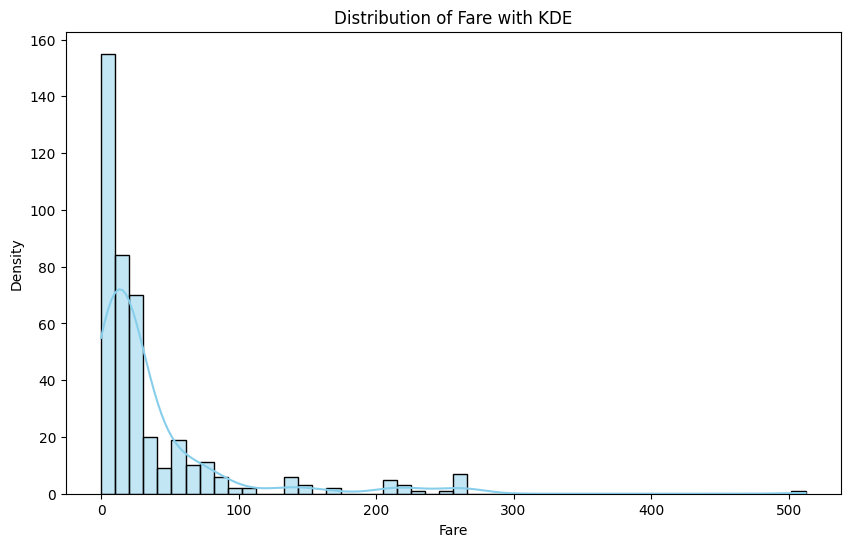

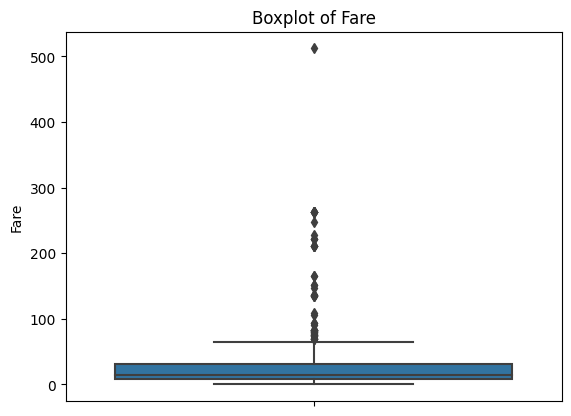

In [24]:
# Histogram with a kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Fare'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Fare with KDE')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# Boxplot
sns.boxplot(y=test_df['Fare'])
plt.title('Boxplot of Fare')
plt.ylabel('Fare')
plt.show()

In [25]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df.isnull().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Embarked               0
Sex_bool               0
Cabin_First_Letter     0
dtype: int64

- **Predicting and Imputing Missing 'Age' Values with Machine Learning Aproach:** We are using a RandomForestRegressor to predict missing ages based on correlated features ('Pclass', 'SibSp', 'Parch'), this method has potentially to capture complex relationships.

In [26]:
train_corr['Age']

Survived   -0.077221
Age         1.000000
Fare        0.096067
Pclass     -0.369226
SibSp      -0.308247
Parch      -0.189119
Sex_bool   -0.093254
Name: Age, dtype: float64

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
data_with_age=train_df.dropna(subset=['Age'])
data_without_age=train_df[train_df['Age'].isnull()]

# 'Pclass' and 'SibSp' are the selected features accrding to correlation
features = ['Pclass', 'SibSp','Parch']

# Prepare the training data for the model
X_train_age = data_with_age[features]
Y_train_age = data_with_age['Age']

# Train a model
model_age = RandomForestRegressor(random_state=444)
model_age.fit(X_train_age,Y_train_age)

# Predict missing ages
X_missing_ages = data_without_age[features]
predicted_ages = model_age.predict(X_missing_ages)

# Fill in the missing values in the original DataFrame
train_df.loc[train_df['Age'].isnull(),'Age'] = predicted_ages

In [28]:
train_df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
Sex_bool              0
Cabin_First_Letter    0
dtype: int64

In [29]:
# Check if there are missing 'Age' values in the test data
if test_df['Age'].isnull().sum() > 0:
    # Prepare the features for the rows with missing 'Age' in the test 
    X_test_missing_age = test_df.loc[test_df['Age'].isnull(), features]
    
    # Predict missing 'Age' values using the model trained on the training data
    predicted_test_ages = model_age.predict(X_test_missing_age)
    
    # Fill in the missing 'Age' values in the test dataset
    test_df.loc[test_df['Age'].isnull(),'Age'] = predicted_test_ages

In [30]:
test_df.isnull().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
Sex_bool              0
Cabin_First_Letter    0
dtype: int64

- **Creating 'Family_size' Feature:** Summing 'SibSp' and 'Parch', plus one for the passenger, generates the 'Family_size' feature. This approach aims to understand how family size influences survival rates, hypothesizing that passengers with family aboard may experience different survival odds compared to solo travelers.

In [31]:
# Creating the 'family_size' feature
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

- **Extracting 'Title' from Names:** Deriving titles from passenger names serves as a proxy for social status, age, and potentially gender. These titles, indicative of social hierarchies and norms, may shed light on survival patterns, providing a sophisticated feature for model investigation.

In [32]:
# Extracting the title
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [33]:
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [34]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [35]:
def consolidate_titles(title):
    # Map of titles to more common or grouped titles
    title_mapping = {
        "Mlle": "Miss",
        "Ms": "Miss",
        "Mme": "Mrs",
        "Dr": "Others", # or "Public_Service",
        "Rev": "Others",
        "Major": "Others",
        "Col": "Others",
        "Capt": "Others",
        "Countess": "Others", # or "Nobility", 
        "Sir": "Others",
        "Lady": "Others",
        "Jonkheer": "Others",
        "Don": "Others",
        "Dona": "Others"
        # Add any other mappings as needed
    }
    # If the title is in the mapping, return the mapped title; otherwise, return the title
    return title_mapping.get(title, title)

In [36]:
# Apply the mapping to both train and test 'Title' columns
train_df['Title'] = train_df['Title'].apply(consolidate_titles)
test_df['Title'] = test_df['Title'].apply(consolidate_titles)

In [37]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: count, dtype: int64

In [38]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

- **Frequency Encoding for 'Ticket':** Assigning frequencies to each ticket reflects the number of passengers sharing it, hinting at families or groups traveling together. This technique transforms a high-cardinality categorical variable into a numerical one, indicating group size, a factor that may influence survival outcomes

In [39]:
# Frequency encoding for 'Ticket'
train_ticket_freq = train_df['Ticket'].value_counts().to_dict()
train_df['Ticket_freq'] = train_df['Ticket'].map(train_ticket_freq)

test_ticket_freq = test_df['Ticket'].value_counts().to_dict()
test_df['Ticket_freq'] = test_df['Ticket'].map(test_ticket_freq)

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Embarked            891 non-null    object 
 11  Sex_bool            891 non-null    int64  
 12  Cabin_First_Letter  891 non-null    object 
 13  Family_size         891 non-null    int64  
 14  Title               891 non-null    object 
 15  Ticket_freq         891 non-null    int64  
dtypes: float

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    object 
 3   Sex                 418 non-null    object 
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    object 
 8   Fare                418 non-null    float64
 9   Embarked            418 non-null    object 
 10  Sex_bool            418 non-null    int64  
 11  Cabin_First_Letter  418 non-null    object 
 12  Family_size         418 non-null    int64  
 13  Title               418 non-null    object 
 14  Ticket_freq         418 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 49.1+ KB

#### [Back to Table of Contents](#toc)

<a id="Visualization"></a>
#### 3. Visualizing the Data

- **Insights from Pair Plot:** By using pairplot with hue='Survived', we can observe the distribution and relationship between 'Age', 'Fare', and 'Family_size' across survival status. This visualization helps identify patterns, such as if age of passengers or those paying higher fares had better survival rates.

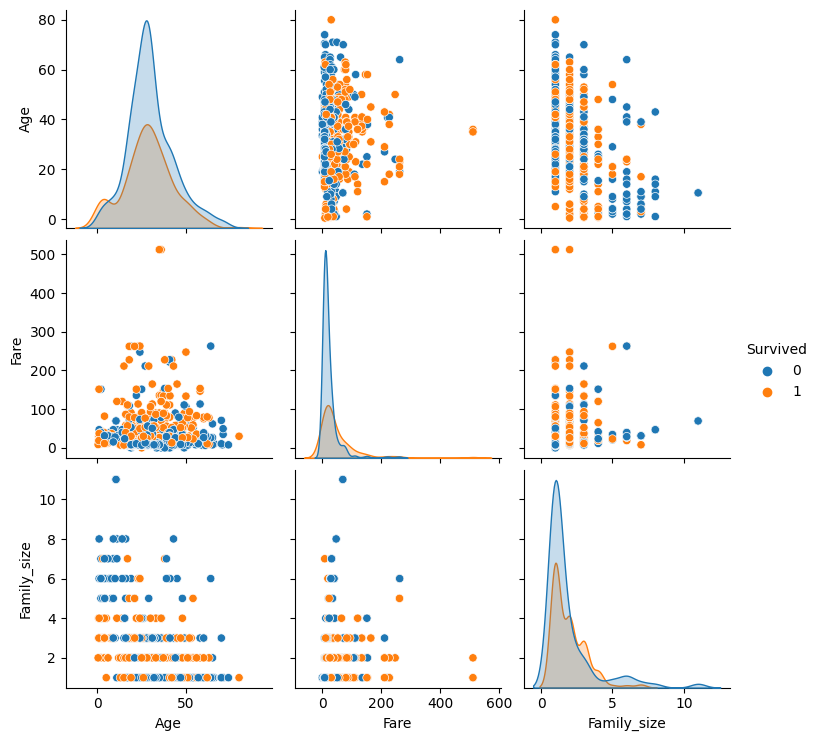

In [42]:
# Select a subset of variables for clarity
subset_data_pairplot = train_df[['Survived', 'Age', 'Fare','Family_size']]
# Pair plot
sns.pairplot(subset_data_pairplot, hue='Survived')

- **Scatter Plot Analysis:** The scatter plot of 'Age' vs. 'Fare' colored by survival status and sized by 'Family_size' offers a detailed look at the interactions between these variables. For instance, higher fare passengers show a pattern of higher survival, and family sizes cluster in specific age range.

Text(0.5, 1.0, 'Age vs. Fare by Survival Status')

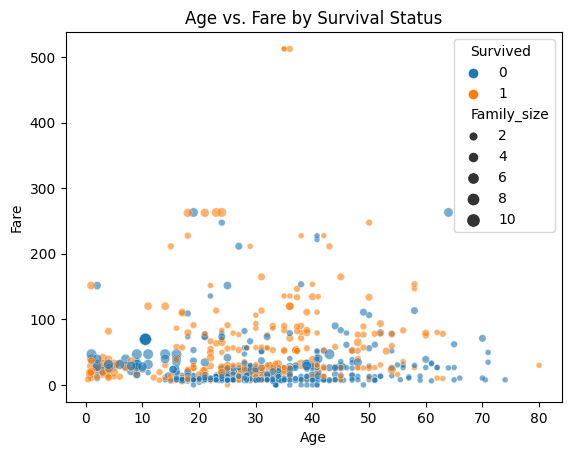

In [43]:
sns.scatterplot(data=subset_data_pairplot, x='Age', y='Fare', hue='Survived', size='Family_size',alpha=0.6)
plt.title('Age vs. Fare by Survival Status')

- **Histograms for Numerical Columns:** Distribution insights, allows us to understand distributions across the dataset, highlighting skewness, outliers, and typical ranges. 

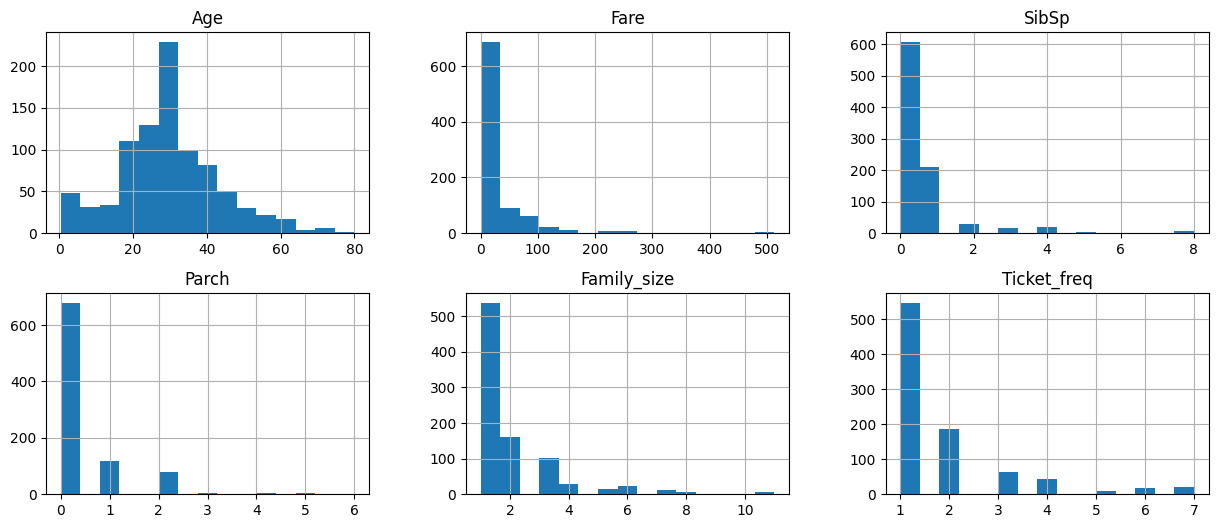

In [44]:
# Selecting numerical columns
#numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
# numerical features for visualisation
numerical_cols = ['Age', 'Fare','SibSp','Parch','Family_size','Ticket_freq'] 

# Plotting histograms for each numerical column
train_df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

- **Survival Count by Feature Histograms:** Histograms plotted for each numerical feature, colored by survival, reveal variations in survival rates across feature values. For instance, specific 'Age' or 'Fare' intervals exhibit higher survival, underscoring their predictive value. Additionally, patterns in survival rates emerge in family size and ticket frequency, suggesting these engineered features hold potential.

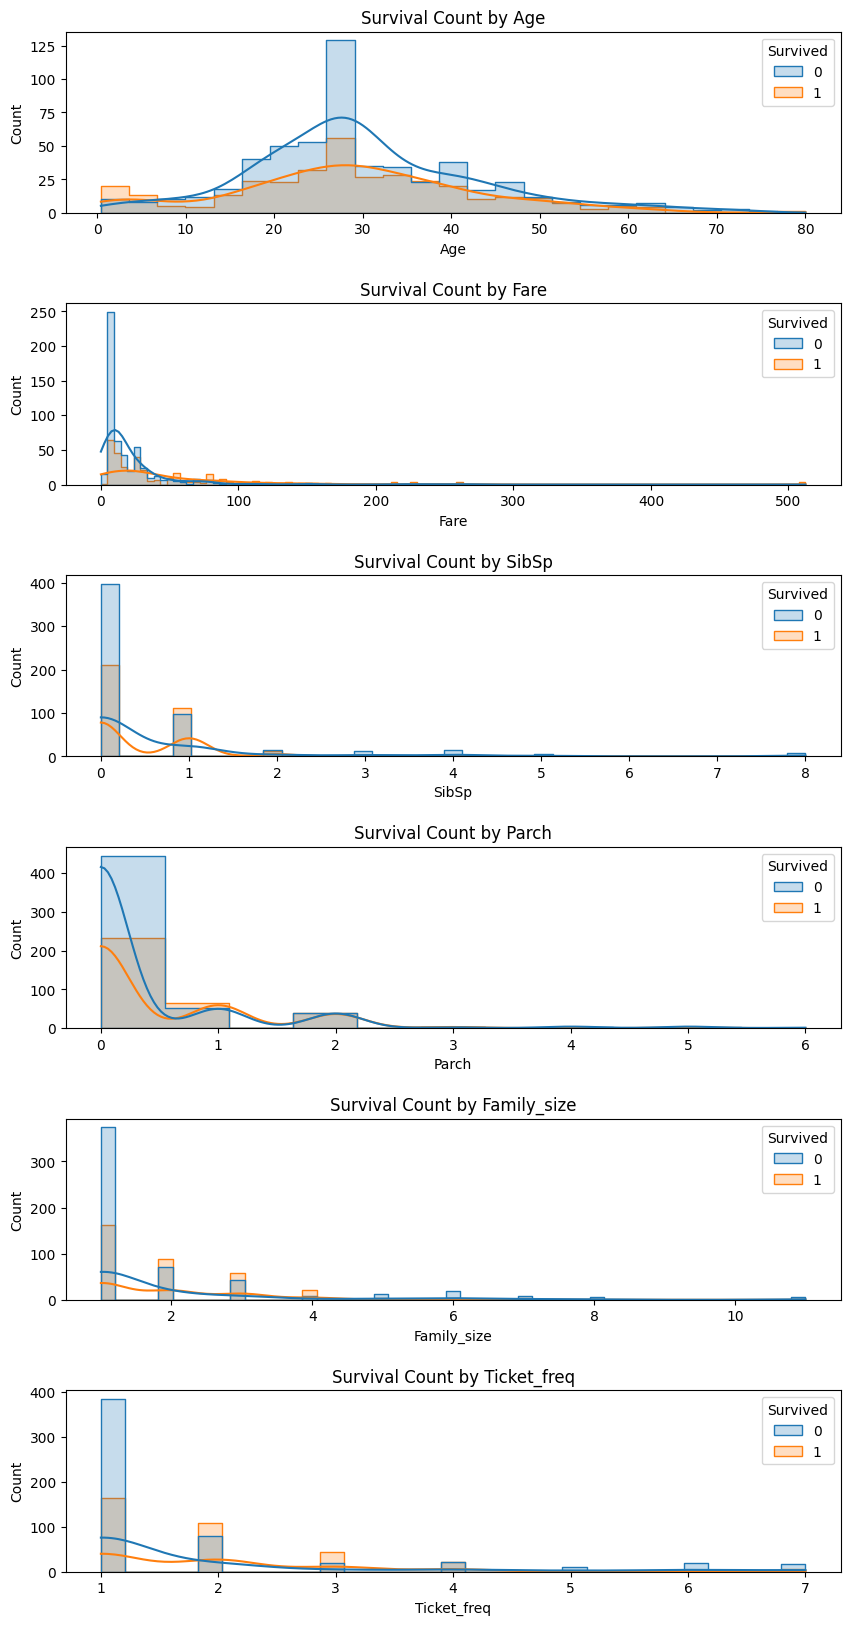

In [45]:
# Set up the plotting layout
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))

# Loop through each feature and create a count plot
for i, feature in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(data=train_df, x=feature, hue='Survived', ax=ax, element='step',kde=True)
    
    # Set titles and labels dynamically
    ax.set_title(f'Survival Count by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
# Adjust the space between plots
plt.subplots_adjust(hspace=0.5)  # Adjust this value as needed to increase/decrease spacing

- **Categorical Feature Distributions:** Count plots for categorical variables ('Pclass', 'Sex', 'Embarked', 'Title') provide insight into their distribution and how these distributions relate to survival. The visualization reveals, for example, that higher class passengers and females had higher survival rate. 'Emabarked' and 'Title' fetaures also show that some groups had higher chance of survival.

In [46]:
# 'No' is coded as 0 and 'Yes' as 1
train_df['Survived_num'] = train_df['Survived']
train_df['Survived'] = train_df['Survived'].map({0: 'No', 1: 'Yes'})

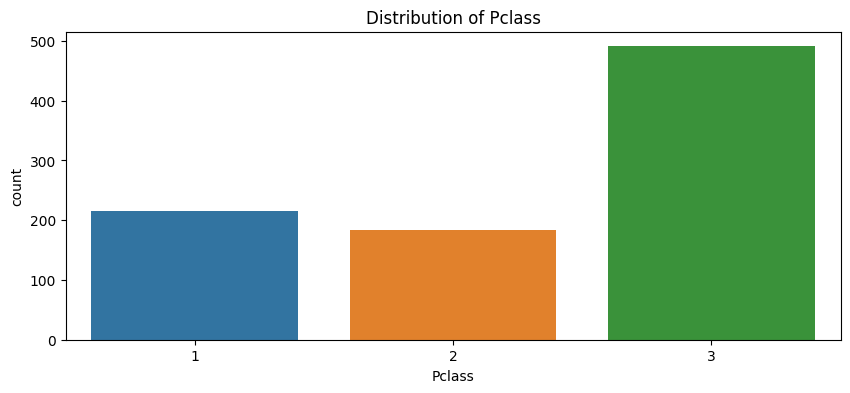

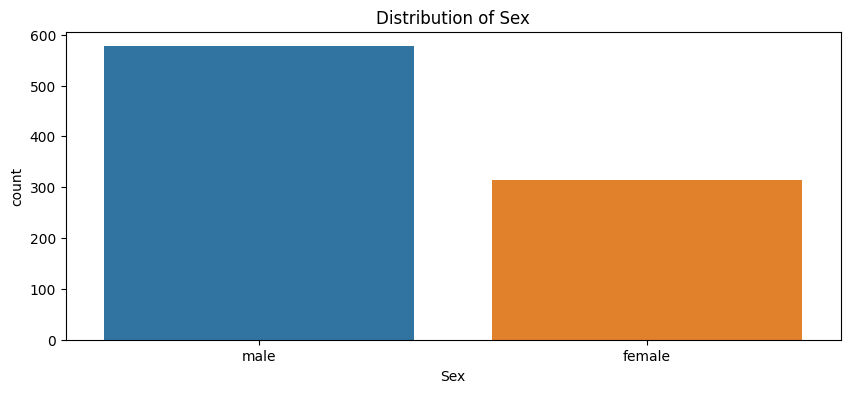

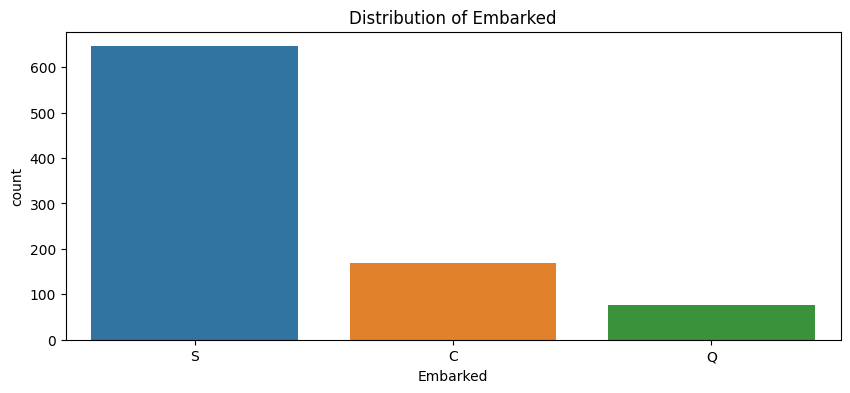

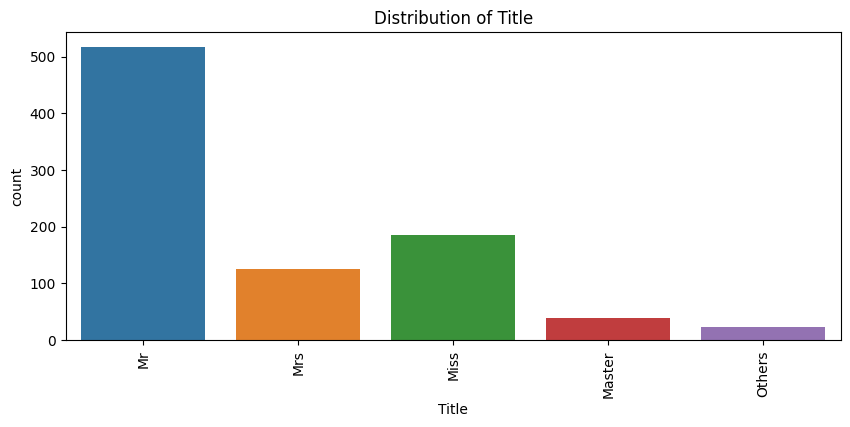

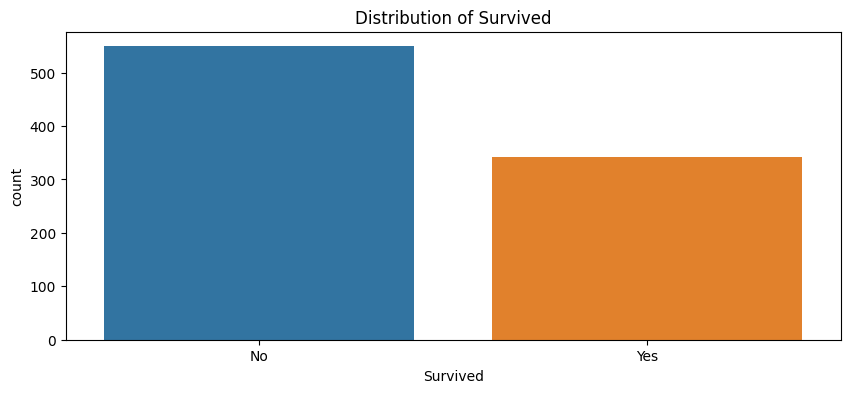

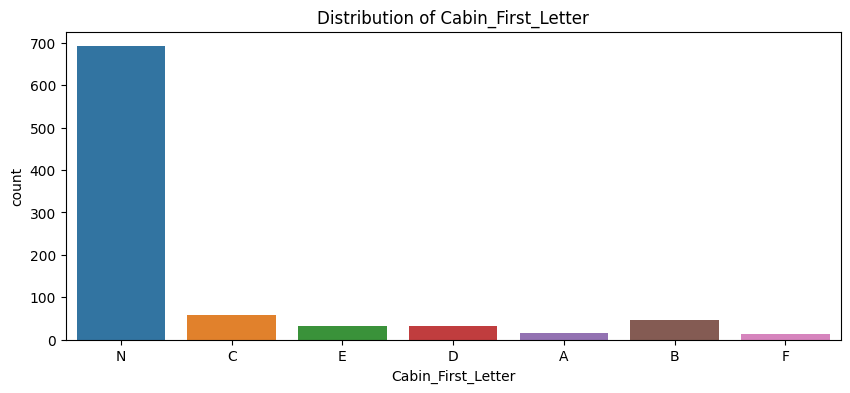

In [47]:
# Selecting categorical columns
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title','Survived','Cabin_First_Letter',]

# Plotting count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    if col == 'Title':
        plt.xticks(rotation=90)
    plt.show()

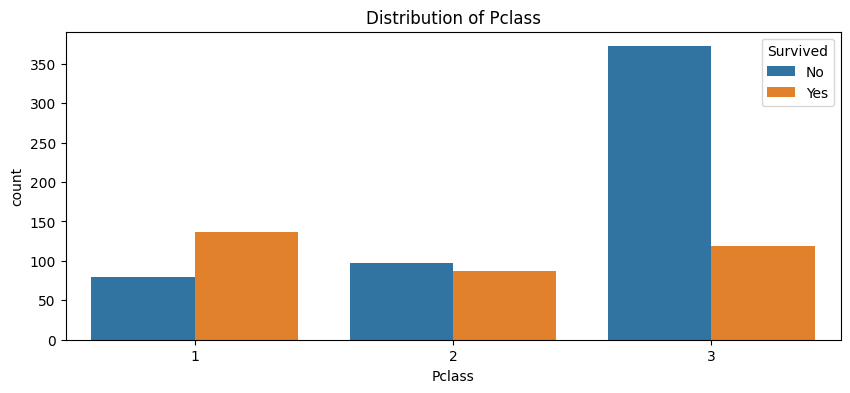

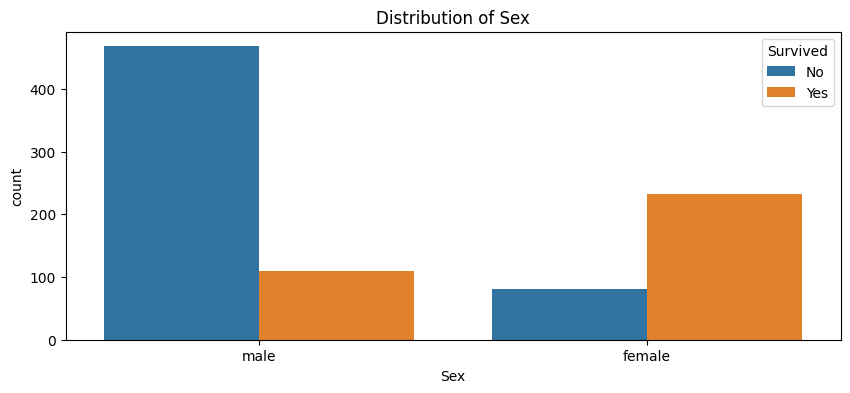

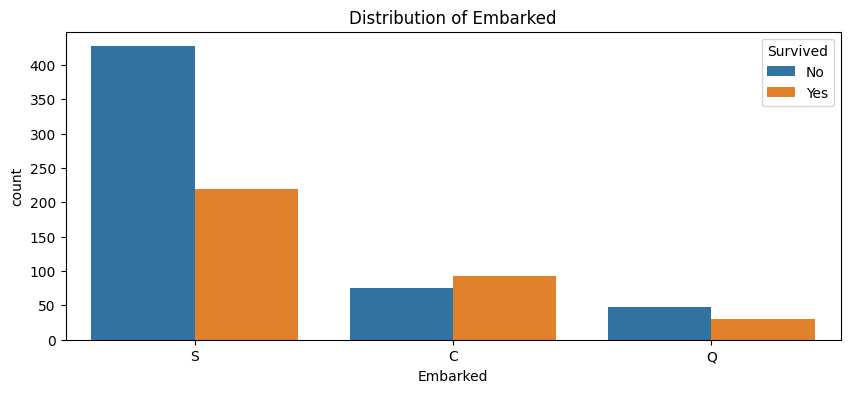

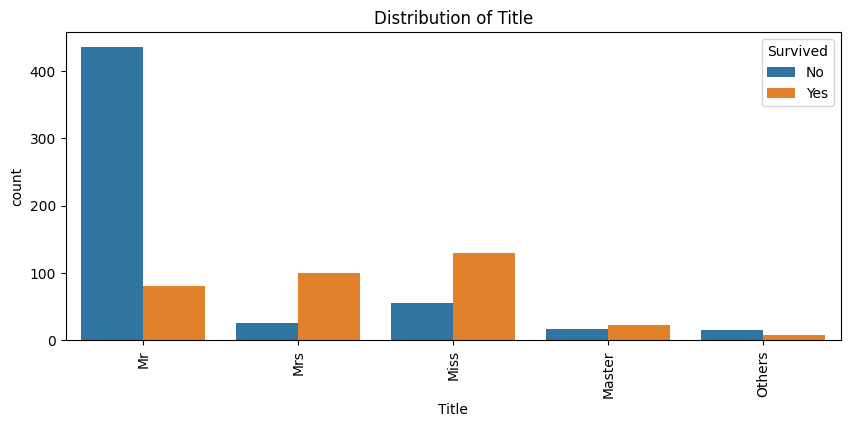

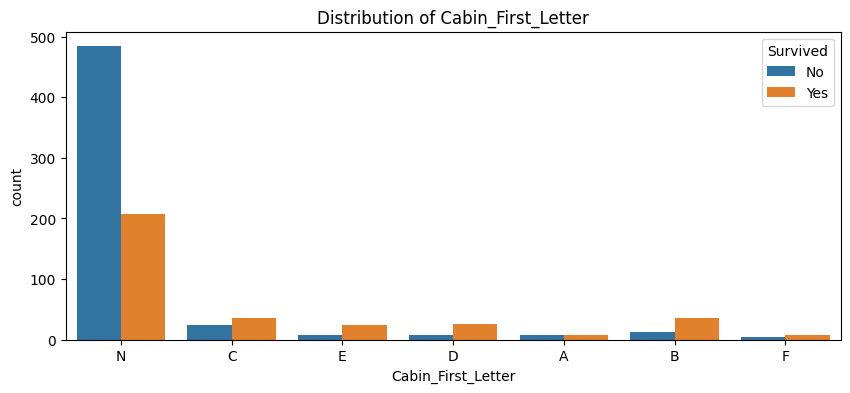

In [48]:
# Selecting categorical columns
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title','Cabin_First_Letter']

# Plotting count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=train_df,hue='Survived')
    plt.title(f'Distribution of {col}')
    if col == 'Title':
        plt.xticks(rotation=90)
    plt.show()

- **Boxplots for Numerical-Categorical Combinations:** Deeper insights into feature interaction, uncovers nuanced relationships, such as how fare varies by class and survival or the age distribution within each passenger class and survival outcome.

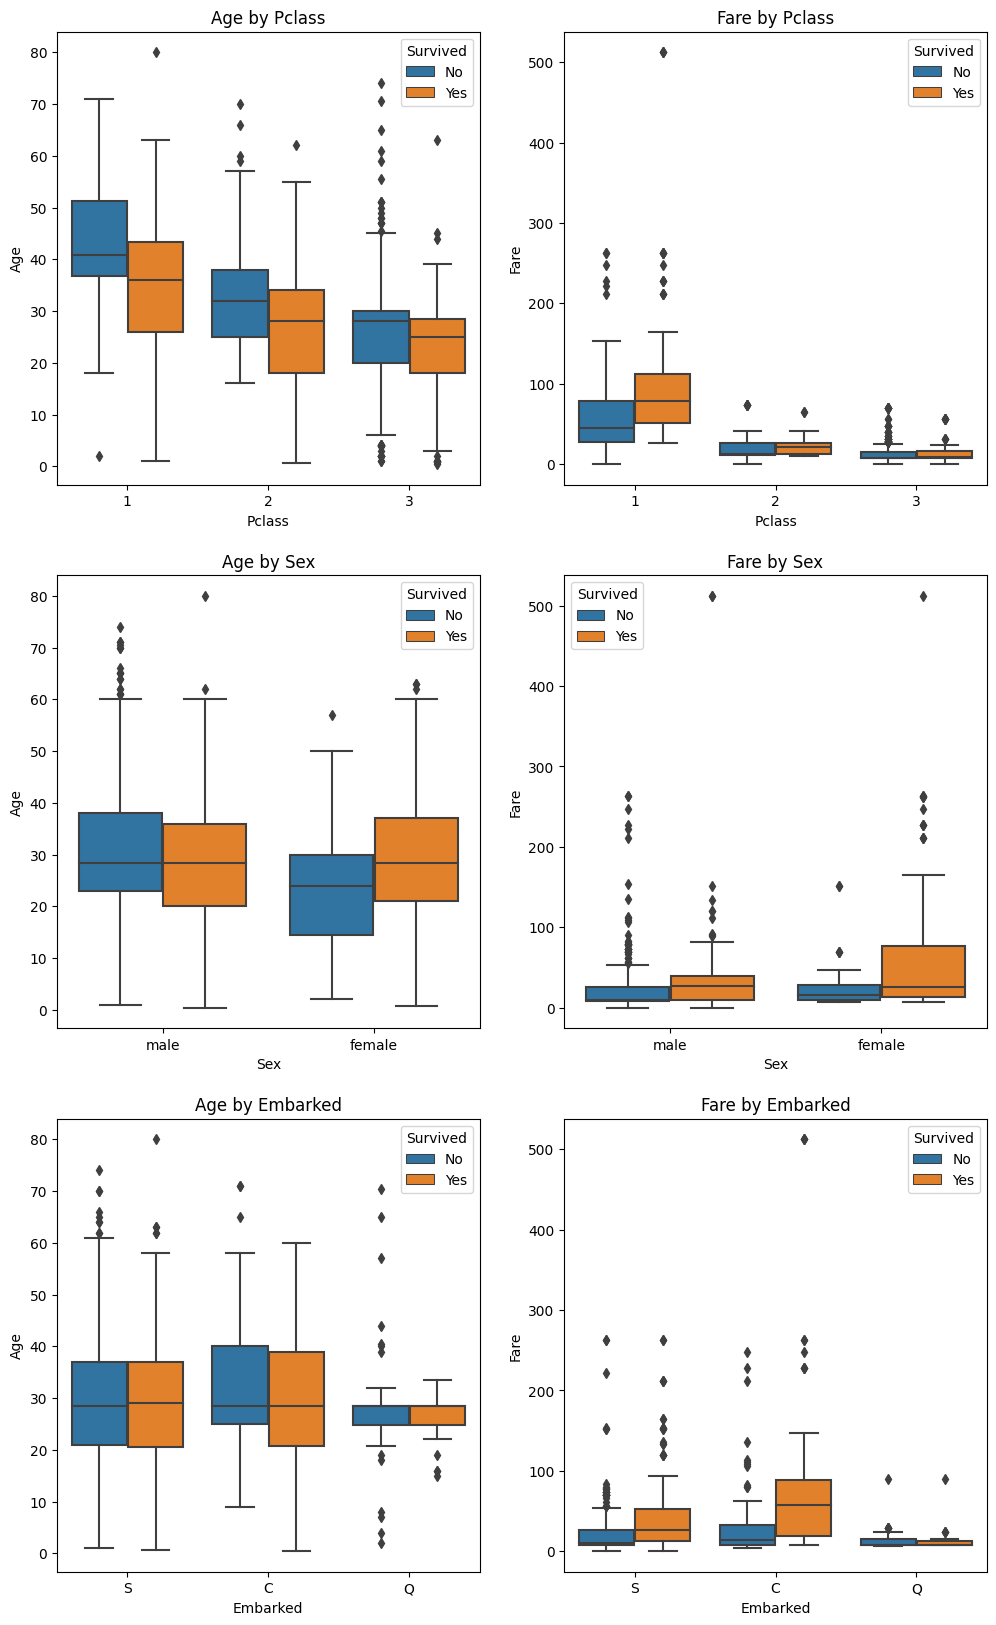

In [49]:
# Selecting categorical columns for boxplot
numerical_cols = ['Age', 'Fare']
# Selecting categorical columns for boxplotS
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Set up the plotting layout
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=len(numerical_cols), figsize=(12, 20))

# Loop through each combination of categorical and numerical feature
for i, cat_feature in enumerate(categorical_cols):
    for j, num_feature in enumerate(numerical_cols):
        # Determine the current subplot
        ax = axes[i, j]
        
        # Create boxplot for current combination
        sns.boxplot(x=cat_feature, y=num_feature, hue='Survived', data=train_df, ax=ax)
        
        # Set titles and labels dynamically
        ax.set_title(f'{num_feature} by {cat_feature}')
        ax.set_xlabel(cat_feature)
        ax.set_ylabel(num_feature)

- **Violin Plots for 'Sex', 'Age', and 'Pclass':** offer a combined view of density and distribution, revealing how age distributions vary by sex and class, and how these factors interact with survival. These plots indicate if certain groups had markedly better survival rates.

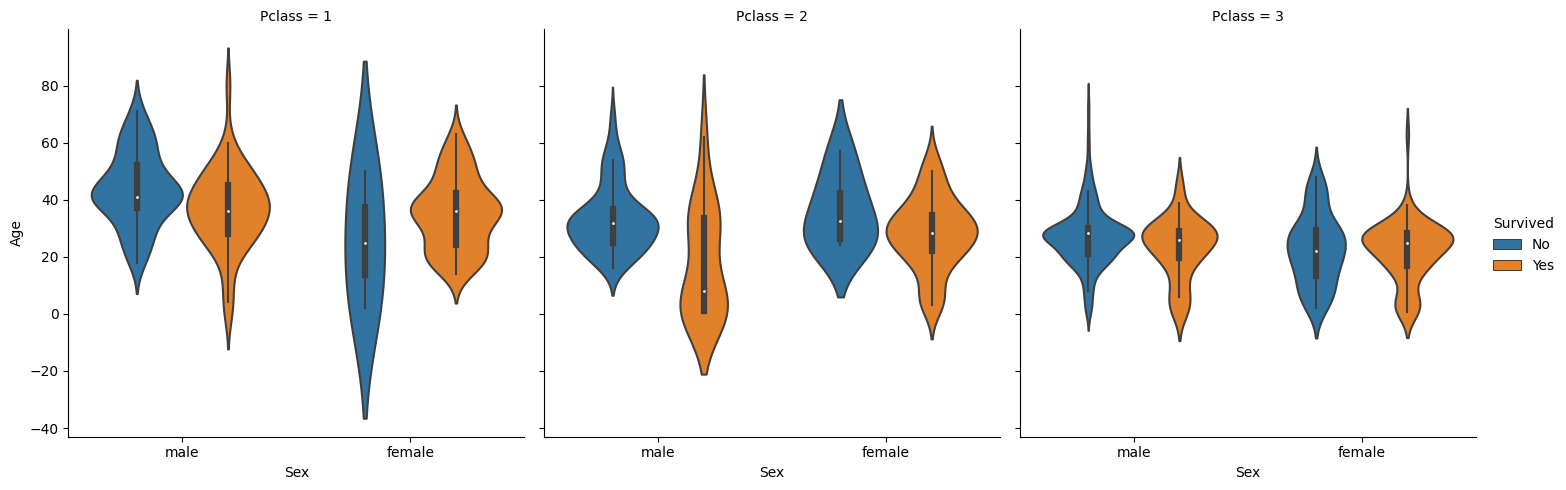

In [50]:
sns.catplot(x='Sex', y='Age', hue='Survived', data=train_df,col='Pclass', kind='violin')

- **Correlation Matrix:** A heatmap showcases the correlations among numerical features and the numerically encoded 'Survived', pinpointing features with strong linear relationships. High correlation coefficients, whether positive or negative, indicate either predictive power or redundancy, offering a visual counterpart to earlier correlation analyses.

In [51]:
train_df['Survived'] = train_df['Survived_num']
train_df = train_df.drop(columns='Survived_num')
numerical_cols_corr = ['Survived','Age', 'Fare','SibSp','Parch','Family_size','Ticket_freq','Pclass',
                       'Sex_bool'] 
matrix_correlation_train = train_df[numerical_cols_corr].corr()
matrix_correlation_train['Survived']

Survived       1.000000
Age           -0.047563
Fare           0.257307
SibSp         -0.035322
Parch          0.081629
Family_size    0.016639
Ticket_freq    0.038247
Pclass        -0.338481
Sex_bool       0.543351
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix of Features')

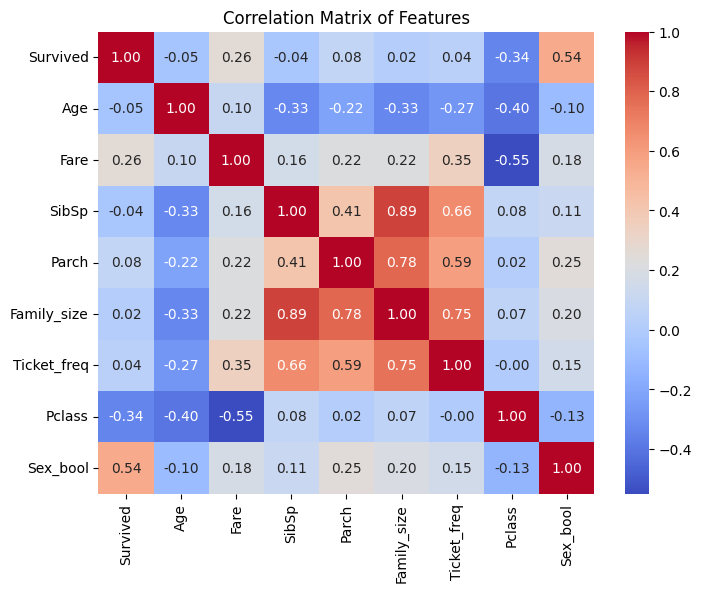

In [52]:
# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_correlation_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')

#### [Back to Table of Contents](#toc)

<a id="Preprocessing"></a>
#### 4. Data Preprocessing for Modeling

- **Dropping Features:**  Identifiers and features possibly encapsulated by others are removed to refine the dataset. Through the iterative process of omitting different feature sets, the aim is to discern those with minimal impact on model efficacy or that could cause redundancy through strong correlations. Linear models and K-Nearest Neighbors (KNN) are particularly sensitive to such correlations, in contrast to Random Forest, Gradient Boosting Machines (XGBoost), and Support Vector Machines (SVC), which exhibit greater resilience.

In [53]:
train_columns_drop = ['PassengerId','Name','Ticket','Sex_bool','SibSp','Parch','Cabin_First_Letter']
# train_columns_drop = ['PassengerId','Name','Ticket','Sex_bool','SibSp','Parch','Ticket_freq']
#train_columns_drop = ['PassengerId','Name','Ticket','Sex_bool']
train_df = train_df.drop(columns=train_columns_drop)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Family_size  891 non-null    int64  
 7   Title        891 non-null    object 
 8   Ticket_freq  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [54]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title,Ticket_freq
0,0,3,male,22.0,7.2500,S,2,Mr,1
1,1,1,female,38.0,71.2833,C,2,Mrs,1
2,1,3,female,26.0,7.9250,S,1,Miss,1
3,1,1,female,35.0,53.1000,S,2,Mrs,2
4,0,3,male,35.0,8.0500,S,1,Mr,1


In [55]:
test_columns_drop = ['PassengerId','Name','Ticket','Sex_bool','SibSp','Parch','Cabin_First_Letter']
#test_columns_drop = ['PassengerId','Name','Ticket','Sex_bool','SibSp','Parch','Ticket_freq']
#test_columns_drop = ['PassengerId','Name','Ticket','Sex_bool']
passanger_ids_test = test_df['PassengerId'].copy()
test_df = test_df.drop(columns=test_columns_drop)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
 5   Family_size  418 non-null    int64  
 6   Title        418 non-null    object 
 7   Ticket_freq  418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [56]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Family_size,Title,Ticket_freq
0,3,male,34.5,7.8292,Q,1,Mr,1
1,3,female,47.0,7.0000,S,2,Mrs,1
2,2,male,62.0,9.6875,Q,1,Mr,1
3,3,male,27.0,8.6625,S,1,Mr,1
4,3,female,22.0,12.2875,S,3,Mrs,1


- **Features and Target Variable Separation**

In [57]:
X_df = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']  # Target variable

- **Data Splitting for Validation:** Dividing the dataset into training and validation sets assesses performance on unseen data, gauging the model's generalization capacity. Stratifying by y maintains consistent class proportions across sets, essential for handling class imbalances. The random_state=800 parameter ensures result reproducibility by managing the split's randomness. Yet, dataset variability means different random_state values might yield varied validation outcomes, complicating the correlation of validation performance with test predictions. To achieve a dependable performance estimate, exploring multiple random_state settings is recommended.

In [58]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_df, y, test_size=0.2, random_state=800, stratify=y)
X_test = test_df

- **Feature Categorization:** Separating features into numerical and categorical groups enables specific preprocessing approaches. Scaling numerical features minimizes scale influence, while one-hot encoding transforms categorical features into a machine-learning-friendly format.

In [59]:
numerical_features = ['Pclass','Age','Fare','Family_size','Ticket_freq']  # Numerical features
categorical_features = ['Sex', 'Embarked','Title']  # Categorical features after initial preprocessing

- **Preprocessing Pipeline:** By utilizing a ColumnTransformer that applies scaling to numerical features and one-hot encoding to categorical ones, preprocessing is accurately targeted to relevant columns. This method streamlines data preparation and safeguards against data leakage, as scaling parameters are derived solely from training data.

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [61]:
# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#### [Back to Table of Contents](#toc)

<a id="ModelTuning"></a>
#### 5. Choosing, Training and Tuning Models

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import  StratifiedKFold, cross_validate, cross_val_score

- **Calculating of the scale_pos_weight**  Calculating the scale_pos_weight parameter addresses class imbalance, allowing XGBoost to adjust its focus. By setting this parameter, the model compensates for imbalances by applying higher penalties to incorrect predictions of the minority class, thereby enhancing its sensitivity towards accurately classifying underrepresented groups.

In [63]:
#survived_train = (y_train==1).sum()
#not_survived_train = (y_train==0).sum()
#scale_pos_weight = not_survived_train/survived_train

- **Cross-Validation Setup:** Employing StratifiedKFold for cross-validation across multiple splits improves the assessment of model performance, especially in imbalanced datasets. This approach guarantees that each fold reflects the overall distribution of target classes, offering a truer gauge of model efficacy. Variability in performance across different random_state settings also highlights the dataset's inherent randomness, emphasizing the importance of considering multiple configurations for a comprehensive performance evaluation.

In [64]:
# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=844)

- **Scoring Metrics Definition:** Defining multiple scoring metrics allows for a holistic view of model performance, capturing various aspects like accuracy, precision (out of all the instances the model identified as positive, how many were actually positive, for example, in email spam detection, a high precision rate ensures that legitimate emails are not incorrectly marked as spam (false positives)), recall (out of all the actual positives, how many did the model correctly identify as positive, for example, in medical diagnosis, a high recall rate is crucial for serious diseases, as failing to identify a disease could have severe consequences), F1 score (a balance between precision and recall), and ROC_AUC (reflecting the trade-off between true positive rate and false positive rate, 1 being perfect and 0.5 representing a model that performs no better than random guessing). This multi-faceted evaluation is crucial for understanding the strengths and weaknesses of the model across different dimensions.

In [65]:
# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

- **Helper Functions** streamline the evaluation of model performance metrics from RandomizedSearchCV or GridSearchCV, extending to analyses on a separate validation set. These functions facilitate the calculation of diverse metrics, offering a comprehensive perspective on performance. Textual and visual confusion matrices illuminate error types, and classification reports deliver precise insights into precision, recall, and F1-score per class, culminating in a consolidated summary across all categories.

In [66]:
# Define a function print metrics from RandomizedSearchCV or GridSearchCV
def print_metrics(cv_results, scoring_metrics, all_metrics=False):
    for metric in scoring_metrics:
        mean_score = cv_results[f'mean_test_{metric}']
        if all_metrics:
            print(f"  {metric.capitalize()}: {mean_score:}")
        best_index = np.argmax(cv_results[f'mean_test_{metric}'])
        print(f"  {metric.capitalize()} (best): {cv_results[f'mean_test_{metric}'][best_index]:.4f} with std of {cv_results[f'std_test_{metric}'][best_index]:.4f}")
        # Retrieve the parameters that led to the best score for the current metric
        best_params = cv_results['params'][best_index]
        print("  Best Parameters:")
        for param, value in best_params.items():
            print(f"  {param}: {value}")
        print("\n")

In [67]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay,classification_report)
# Define a function to calculate and print metrics for the validation set
def print_validation_metrics(best_estimator, X_val, y_val):
    y_pred = best_estimator.predict(X_val)
    print(f"  Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"  Validation Precision: {precision_score(y_val, y_pred, average='macro'):.4f}")
    print(f"  Validation Recall: {recall_score(y_val, y_pred, average='macro'):.4f}")
    print(f"  Validation F1: {f1_score(y_val, y_pred, average='macro'):.4f}")
    print(f"  Validation ROC AUC: {roc_auc_score(y_val, y_pred):.4f}")
    print('  Validation Confusion matrix: ')
    print(confusion_matrix(y_val, y_pred))
    ConfusionMatrixDisplay.from_estimator(best_estimator,X_val, y_val)
    plt.show()
    print(classification_report(y_val, y_pred))   

- **Diverse Selected Model Evaluation and Customized Parameter Spaces**: By including a variety of models, from linear models (Logistic Regression) to ensemble methods (XGBoost) and SVMs, we are able to assess which model type is most effective for your specific dataset. Defining specific parameter grids for each model allows for targeted exploration of each model's most influential hyperparameters, which can significantly impact model performance. 
    - Step-by-Step Hyperparameter Exploration: Initiating the search with a limited set of key hyperparameters for each model is crucial. This approach allows for a preliminary understanding of how each model behaves in response to changes in its parameters without overwhelming computational resources. Once a baseline performance is established, we can progressively expand the search space to explore more hyperparameters or refine the ranges of the initially selected ones.

In [68]:
# #List of (name, estimator) tuples 
# models_and_parameters_randCV = {
# 'LogisticRegression': (LogisticRegression(class_weight='balanced',random_state=15, max_iter=1000),
#                        {
#                            'classifier__C': [0.01, 0.1, 1,10],  # Lower C values increase regularization
#                            'classifier__penalty': ['l2', 'l1'],  # L1 can lead to sparser solutions
#                            'classifier__solver': ['liblinear']  # 'liblinear' is a good choice for small datasets and supports 'l1'
#                        }),

    
# 'XGBClassifier': (xgb.XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=15),
#                       {
#                 'classifier__n_estimators': [50,100,150],
#                 'classifier__learning_rate': [0.05,0.07,0.1,0.5],
#                 'classifier__max_depth': [5,6,9,12],
#                         }),    
# 'RandomForestClassifier': (RandomForestClassifier(class_weight='balanced',random_state=15),
#                            {
#                                'classifier__n_estimators': [25,25,45],
#                                'classifier__max_depth': [5,7,9], 
#                            }),
# 'KNeighborsClassifier': (KNeighborsClassifier(),
#                          {
#                              'classifier__n_neighbors': [20,30,40,50],  # Increasing the number of neighbors usually increases bias and can help with overfitting
#                              'classifier__weights': ['uniform', 'distance'],  # 'distance' can sometimes help with overfitting by considering closer neighbors more
#                            }),

# 'SVC': (SVC(class_weight='balanced', probability=True),  # 'probability=True' to enable probability estimates
#     {
#         'classifier__C': np.logspace(-2, 3, 6), # Explores a wide range of regularization strengths
#         'classifier__kernel': ['rbf','sigmoid'],   # Include different kernels
#         'classifier__gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Includes 'scale', 'auto', and a range of specific values
#     }),
    
#     # some of other models:
#     # 'Gradient Boosting': GradientBoostingClassifier(),
#     # 'LightGBM': lgb.LGBMClassifier(is_unbalance=True,verbose=-1),
#     # 'CatBoost': cb.CatBoostClassifier(auto_class_weights='Balanced',verbose=0),  # 'verbose=0' to silence CatBoost training output


# }

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

- **Efficient Model Exploration with RandomizedSearchCV:** We leverage RandomizedSearchCV within our pipelines for each model to efficiently explore a broad parameter space across multiple models, using cross-validation to ensure robust evaluation. By sampling a subset of hyperparameters randomly, we provide a quick assessment of each model's potential without the exhaustive computation required by GridSearchCV.  

In [70]:
# # Loop to apply RandomizedSearchCV for each model
# for model_name, (model, param_rand) in models_and_parameters_randCV.items():
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('classifier', model)])
    
    
#     rand_search = RandomizedSearchCV(pipeline, param_rand, cv=stratified_kfold, scoring=scoring_metrics, 
#                                      refit='accuracy', n_jobs=-1,random_state=13,verbose=0,n_iter=10)
#     rand_search.fit(X_train, y_train)
    
#     print(f"{model_name} best parameters: {rand_search.best_params_}")
#     print(f"{model_name} best score: {rand_search.best_score_}")
#     print_metrics(rand_search.cv_results_,scoring_metrics)
#     print(f"Validation Metrics for {model_name}:")
#     print_validation_metrics(rand_search.best_estimator_, X_val, y_val)
#     print("\n")           

- **Selected models for GridSearchCV parameter tuning.**

In [71]:
#List of (name, estimator) tuples 
models_and_parameters = {
#'LogisticRegression': (LogisticRegression(class_weight='balanced',random_state=15, max_iter=1000),
'LogisticRegression': (LogisticRegression(class_weight='balanced',random_state=13),
                       {
                           'classifier__C': [0.01, 0.02, 0.05, 0.1, 0.2,1,10,20],  # Lower C values increase regularization
                           'classifier__penalty': ['l2', 'l1'],  # L1 can lead to sparser solutions
                           'classifier__solver': ['liblinear']  # 'liblinear' is a good choice for small datasets and supports 'l1'
                       }),

#'XGBClassifier': (xgb.XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=15),   
'XGBClassifier': (xgb.XGBClassifier(random_state=13),
                      {
                'classifier__n_estimators': [50,100,150],
                'classifier__learning_rate': [0.02,0.03, 0.04,0.05],
                'classifier__max_depth': [5,6,9],
                'classifier__min_child_weight': [15,18,20,25,30,35],  # Minimum sum of instance weight needed in a child
                'classifier__subsample': [0.8],  # Subsample ratio of the training instances
                'classifier__colsample_bytree': [0.8],  # Subsample ratio of columns when constructing each tree
}),    
#'RandomForestClassifier': (RandomForestClassifier(class_weight='balanced',random_state=15),
'RandomForestClassifier': (RandomForestClassifier(random_state=13),
                           {
                               'classifier__n_estimators': [50, 100, 150],
                               'classifier__max_depth': [2,3,5],  # Shallower trees
                               'classifier__min_samples_split': [17,19,21],
                               'classifier__min_samples_leaf': [16,18,20],
                               'classifier__max_features': ['sqrt', 'log2']  # Limiting the number of features reduces variance
                           }),
'KNeighborsClassifier': (KNeighborsClassifier(),
                         {
                             'classifier__n_neighbors': [40,50,60],  # Increasing the number of neighbors usually increases bias and can help with overfitting
                             'classifier__weights': ['uniform', 'distance'],  # 'distance' can sometimes help with overfitting by considering closer neighbors more
                             'classifier__leaf_size': [30, 35, 40],  # Can affect the speed of the construction and query, as well as overfitting
                         }),


}

**Pipeline Integration and Comprehensive Grid Search:** Our approach methodically explores the specified parameter grid for each model within a pipeline that encapsulates both preprocessing and classification steps. This exhaustive search is pivotal for evaluating various parameter combinations effectively. To inform the scope of GridSearchCV, insights from preliminary RandomizedSearchCV explorations and domain knowledge are invaluable. These insights help define more targeted parameter ranges and values, enhancing the efficiency and relevance of the grid search.

- **Iterative Refinement and Exploration:** Model tuning and feature selection are inherently iterative processes. Initial rounds of GridSearchCV can also serve as exploratory phases, from which we gather critical insights into how different hyperparameters impact model performance. Depending on the outcomes, it's often necessary to circle back to earlier stages of the modeling pipeline. This might involve:
    - **Revisiting Feature Engineering:** Based on model performance insights, we may identify opportunities to engineer new features, transform existing ones, or even remove features that contribute to overfitting or underfitting.
    - **Considering Dimensionality Reduction:** In cases where models struggle with high-dimensional data or overfitting, techniques like PCA (Principal Component Analysis) or feature selection methods can be employed to simplify the model and potentially enhance performance.
    - **Expanding or Refining Parameter Grids:** Armed with knowledge from initial grid searches, we can adjust our parameter grids to zoom in on promising hyperparameter values or expand them to explore previously overlooked areas.
    - **Adaptive Refinement Based on Results:** The tuning process is dynamic, necessitating adjustments to parameter grids and preprocessing strategies based on continuous feedback from model evaluations. This adaptiveness ensures that our search for optimal model configurations is both grounded in empirical evidence and agile enough to explore new avenues as they become relevant.

- **Final Evaluation and Continuous Improvement:** The best estimator identified by GridSearchCV undergoes a final evaluation on the validation set. The performance on the validation set can offer new insights, prompting further iterations of tuning, feature engineering, or even model selection.

LogisticRegression best parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
LogisticRegression best score: 0.8215766823161189
  Accuracy (best): 0.8216 with std of 0.0521
  Best Parameters:
  classifier__C: 10
  classifier__penalty: l1
  classifier__solver: liblinear


  Precision (best): 0.7633 with std of 0.0757
  Best Parameters:
  classifier__C: 10
  classifier__penalty: l2
  classifier__solver: liblinear


  Recall (best): 0.8134 with std of 0.0907
  Best Parameters:
  classifier__C: 0.02
  classifier__penalty: l1
  classifier__solver: liblinear


  F1 (best): 0.7704 with std of 0.0678
  Best Parameters:
  classifier__C: 10
  classifier__penalty: l2
  classifier__solver: liblinear


  Roc_auc (best): 0.8666 with std of 0.0573
  Best Parameters:
  classifier__C: 10
  classifier__penalty: l1
  classifier__solver: liblinear


Validation Metrics for LogisticRegression:
  Validation Accuracy: 0.8045
  Validation Precision: 0.7946
  Validati

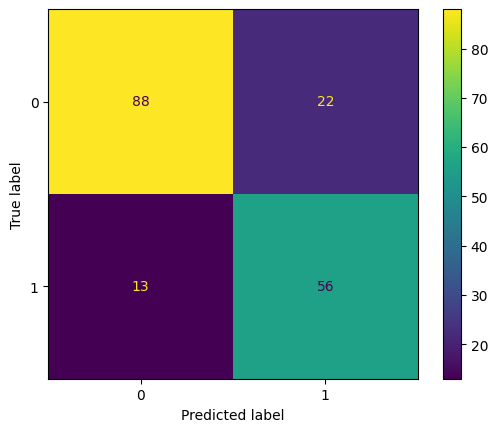

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       110
           1       0.72      0.81      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



XGBClassifier best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.04, 'classifier__max_depth': 5, 'classifier__min_child_weight': 15, 'classifier__n_estimators': 150, 'classifier__subsample': 0.8}
XGBClassifier best score: 0.82306338028169
  Accuracy (best): 0.8231 with std of 0.0422
  Best Parameters:
  classifier__colsample_bytree: 0.8
  classifier__learning_rate: 0.04
  classifier__max_depth: 5
  classifier__min_child_weight: 15
  classifier__n_estimators: 150
  classifier__subsample: 0.8


  Precision (best): 0.9616 with std of 0.0399
  Best Parameters:
  classifier__colsample_bytree: 0.8
  classifier__learning_rate: 0.02
  c

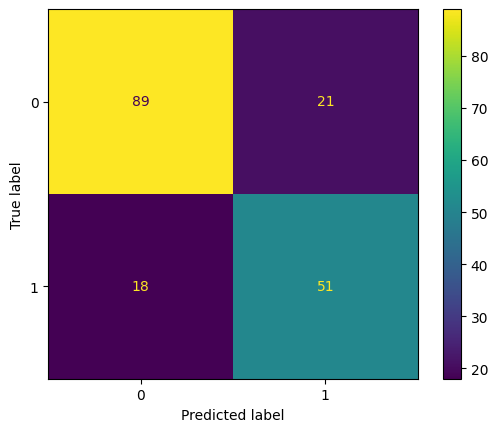

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       110
           1       0.71      0.74      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



RandomForestClassifier best parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 16, 'classifier__min_samples_split': 17, 'classifier__n_estimators': 100}
RandomForestClassifier best score: 0.82018779342723
  Accuracy (best): 0.8202 with std of 0.0492
  Best Parameters:
  classifier__max_depth: 5
  classifier__max_features: sqrt
  classifier__min_samples_leaf: 16
  classifier__min_samples_split: 17
  classifier__n_estimators: 100


  Precision (best): 0.8055 with std of 0.0697
  Best Parameters:
  classifier__max_depth: 5
  classifier__max_features: sqrt
  classifier__min_samples_leaf: 16
  classifier__min_s

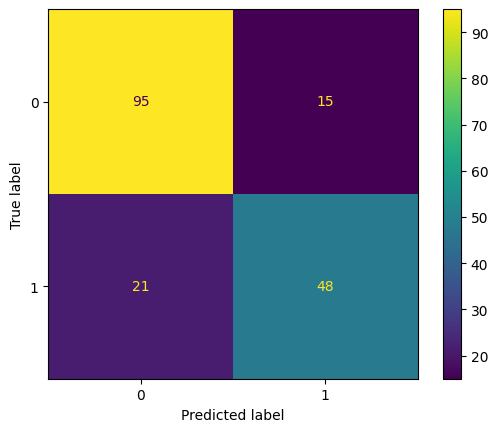

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



KNeighborsClassifier best parameters: {'classifier__leaf_size': 30, 'classifier__n_neighbors': 40, 'classifier__weights': 'uniform'}
KNeighborsClassifier best score: 0.8173317683881065
  Accuracy (best): 0.8173 with std of 0.0613
  Best Parameters:
  classifier__leaf_size: 30
  classifier__n_neighbors: 40
  classifier__weights: uniform


  Precision (best): 0.7903 with std of 0.0920
  Best Parameters:
  classifier__leaf_size: 30
  classifier__n_neighbors: 40
  classifier__weights: uniform


  Recall (best): 0.7475 with std of 0.1019
  Best Parameters:
  classifier__leaf_size: 30
  classifier__n_neighbors: 50
  classifier__weights: distance


  F1 (best): 0.7534 w

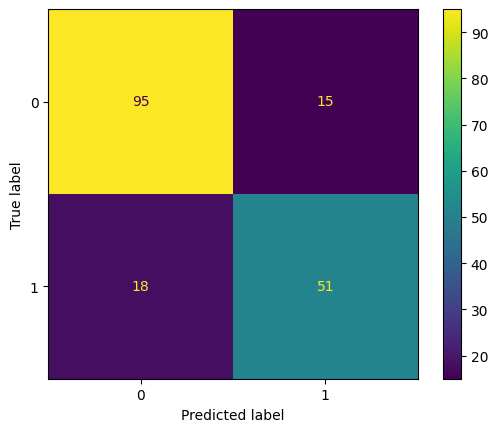

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179





In [72]:
# Loop to apply GridSearchCV for each model
for model_name, (model, param_grid) in models_and_parameters.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring=scoring_metrics, refit='accuracy', 
                               n_jobs=-1,verbose=0)
    grid_search.fit(X_train, y_train)
    
    print(f"{model_name} best parameters: {grid_search.best_params_}")
    print(f"{model_name} best score: {grid_search.best_score_}")
    print_metrics(grid_search.cv_results_,scoring_metrics)
    # Evaluate on the validation set using the best estimator
    print(f"Validation Metrics for {model_name}:")
    print_validation_metrics(grid_search.best_estimator_, X_val, y_val)
    print("\n")

- **Selected Models** for a showcase of more dynamic and efficient pathways of fine-tuning.

In [73]:
from skopt.space import Real, Integer, Categorical

models_and_search_spaces = {
        #'Support Vector Machine': (SVC(class_weight='balanced', probability=True, random_state=15),
        'Support Vector Machine': (SVC(probability=True, random_state=15),
        {
            'classifier__C': Real(1e-3, 1e+1, prior='log-uniform'),  # Regularization parameter
            'classifier__gamma': Real(1e-3, 1e+3, prior='log-uniform'),  # Kernel coefficient
            'classifier__kernel': Categorical(['rbf']),  # Kernel type
        }
    )
    #     'XGBClassifier': (
    #     xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=15),
    #     {
    #         'classifier__n_estimators': Integer(50, 150),  # Number of trees
    #         'classifier__learning_rate': Real(0.05, 0.1, prior='log-uniform'),  # Learning rate
    #         'classifier__max_depth': Integer(5, 9),  # Depth of tree
    #         'classifier__min_child_weight': Integer(15, 20),  # Minimum sum of instance weight needed in a child
    #         'classifier__subsample': Real(0.6, 0.8, prior='uniform'),  # Subsample ratio of the training instances
    #         'classifier__colsample_bytree': Real(0.6, 0.8, prior='uniform'),  # Subsample ratio of columns when constructing each tree
    #     }
    # )
}

**Advanced Hyperparameter Tuning Techniques:**
Exploring beyond traditional methods like RandomizedSearchCV and GridSearchCV, we find advanced techniques for hyperparameter tuning that offer more dynamic and efficient optimization paths:

- **Bayesian Optimization:** Utilizes a probabilistic model to predictively select hyperparameters, minimizing function evaluations. Implemented by tools like Hyperopt, BayesianOptimization, and Optuna, it enables guided exploration based on prior evaluations.

- **Gradient-Based Optimization:** Available through Scikit-Optimize (skopt), this technique uses gradient information for a more directed search, ideal for differentiable objective functions.

- **Genetic Algorithms:** Inspired by natural selection, these algorithms evolve hyperparameters over generations, seeking optimal combinations. Libraries like DEAP support this evolutionary approach.

- **Successive Halving and Hyperband:** These strategies start with broad evaluations on a small budget, increasingly focusing on top performers. Optuna, for instance, dynamically allocates resources to improve efficiency.

- **Model-Based Optimization:** Scikit-Optimize extends Bayesian principles to a wider range of models for approximating the objective function, offering flexible, model-guided hyperparameter searches.

Support Vector Machine best parameters: OrderedDict([('classifier__C', 2.3914884254768554), ('classifier__gamma', 0.059162496105020404), ('classifier__kernel', 'rbf')])
Support Vector Machine best score: 0.8468896713615024
Validation Metrics for Support Vector Machine:
  Validation Accuracy: 0.8156
  Validation Precision: 0.8067
  Validation Recall: 0.8014
  Validation F1: 0.8038
  Validation ROC AUC: 0.8014
  Validation Confusion matrix: 
[[95 15]
 [18 51]]


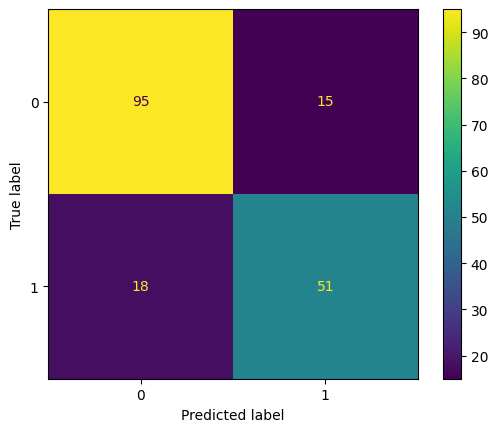

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179





In [74]:
from skopt import BayesSearchCV


# Iterating through models and search spaces
for model_name, (model, search_spaces) in models_and_search_spaces.items():
  
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    bayes_search = BayesSearchCV(estimator=pipeline,
                                 search_spaces=search_spaces,
                                 cv=stratified_kfold,
                                 n_iter=50,
                                 scoring='accuracy',
                                 refit=True,
                                 random_state=844,
                                 n_jobs=-1,
                                 verbose=0)
    
    np.int = int
    bayes_search.fit(X_train, y_train)
    
    print(f"{model_name} best parameters: {bayes_search.best_params_}")
    print(f"{model_name} best score: {bayes_search.best_score_}")
    
    # Evaluate on the validation set using the best estimator
    print(f"Validation Metrics for {model_name}:")
    print_validation_metrics(bayes_search.best_estimator_, X_val, y_val)
    print("\n")


#### [Back to Table of Contents](#toc)

<a id="Deployment"></a>
#### 6. Finalizing the Model and Submission (Deployment)

- **Best-performing model**

In [75]:
best_model = xgb.XGBClassifier(random_state=13, colsample_bytree = 0.8,
                                        learning_rate=0.04, max_depth = 5,min_child_weight=15,
                                        n_estimators = 150, subsample = 0.8)

- **Combining datasets:** We consolidate our training and validation sets into a single dataset to retrain our best-performing model using the entirety of the available data, excluding the test set. This approach ensures that our model learns from the most comprehensive dataset possible, enhancing its ability to generalize before making predictions on unseen test data.

In [76]:
def combine_datasets(X_train, X_val, y_train, y_val):
    """
    Combines training and validation datasets for features and target variables, 
    and resets the index of the combined datasets.

    Parameters:
    - X_train: Training features DataFrame
    - X_val: Validation features DataFrame
    - y_train: Training target series
    - y_val: Validation target series

    Returns:
    - combined_X_train: Combined training and validation features DataFrame
    - combined_y: Combined training and validation target series
    """
    # Combine the feature datasets and reset the index
    combined_X_train = pd.concat([X_train, X_val], axis=0)
    combined_X_train.reset_index(drop=True, inplace=True)
    
    # Combine the target datasets and reset the index
    combined_y = pd.concat([y_train, y_val], axis=0)
    combined_y.reset_index(drop=True, inplace=True)
    
    return combined_X_train, combined_y

In [77]:
combined_X_train, combined_y = combine_datasets(X_train, X_val, y_train, y_val)


- The top-performing model is retrained on the full dataset, excluding test data, using a pipeline that combines preprocessing and classification.

In [78]:
# retrain best model on whole train set
pipe_best_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', best_model)])
#Train the pipeline
pipe_best_model.fit(combined_X_train, combined_y) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Family_size',
                                                   'Ticket_freq']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.04,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=15, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=13, ...))])

In [79]:
final_predictions_best_model = pipe_best_model.predict(X_test)

- Exporting to CSV

In [80]:
def create_submission_file(passenger_ids, predictions, extension='mk'):
    """
    Creates a submission file for the Kaggle Titanic competition with a specified extension.

    Parameters:
    - passenger_ids: Array-like, containing the PassengerId of the test dataset.
    - predictions: Array-like, containing the predictions for the test dataset.
    - extension: String, the suffix to append to the filename before the .csv extension.

    The function creates a CSV file named "submission_EXTENSION.csv" with two columns: PassengerId and Survived.
    """
    # Construct the filename using the provided extension
    filename = f'submission_{extension}.csv'
    
    # Create a DataFrame with the required structure
    submission_df = pd.DataFrame({
        'PassengerId': passenger_ids,
        'Survived': predictions
    })
    
    # Output the DataFrame to a CSV file, without the index
    submission_df.to_csv(filename, index=False)
    
    print(f"Submission file '{filename}' created successfully.")

In [81]:
create_submission_file(passanger_ids_test, final_predictions_best_model, 'best_model')

Submission file 'submission_best_model.csv' created successfully.


#### [Back to Table of Contents](#toc)

<a id="Ensemble"></a>
#### 8. Ensemble techniques

- **Base Models for Ensemble Strategies:** Selecting a varied lineup of models is pivotal for our ensemble techniques, which include Logistic Regression, XGBoost, RandomForest, KNN, and SVC as base learners. Each model contributes unique strengths: Logistic Regression, offers a good baseline; XGBoost excels in capturing complex patterns through gradient boosting; RandomForest navigates through decision trees to enhance accuracy; KNN leverages proximity for predictions; and SVC excels in identifying patterns in high-dimensional spaces. Ensuring these base models generate predictions that aren't overly correlated is key, as similar outputs could diminish the ensemble's effectiveness and risk overfitting. 

In [82]:
# Base Models
models_ensamble = {
   
    'LogisticRegression': LogisticRegression(random_state=13, C=0.2,penalty = 'l1',solver ='liblinear'),
    
    'RandomForestClassifier': RandomForestClassifier(random_state=13,
                                                     max_depth=5,max_features = 'sqrt',
                                                     min_samples_leaf = 16, min_samples_split = 17,
                                                     n_estimators = 100),
    'KNeighborsClassifier': KNeighborsClassifier(leaf_size = 30, n_neighbors = 40,weights ='uniform'),
    
    'SVC': SVC(probability=True,C=1.9901555057769618,gamma = 0.07032614727988862,kernel = 'rbf',random_state=13),
}

- **Training Base Models:** Retraining the selected models on the full training dataset is a standard practice before voting or stacking. It allows the base models to learn from the entire dataset, potentially improving their predictive accuracy and generalization capability.

Validation Metrics for LogisticRegression:
  Validation Accuracy: 0.7989
  Validation Precision: 0.7877
  Validation Recall: 0.7877
  Validation F1: 0.7877
  Validation ROC AUC: 0.7877
  Validation Confusion matrix: 
[[92 18]
 [18 51]]


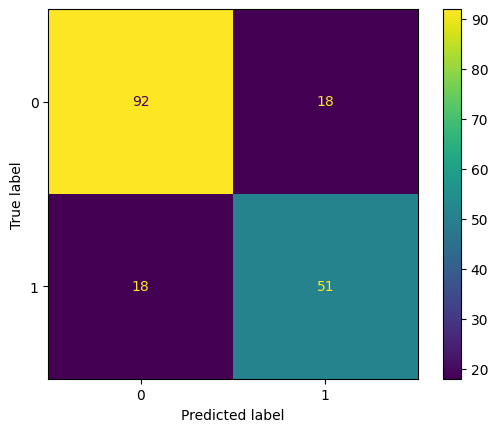

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Validation Metrics for RandomForestClassifier:
  Validation Accuracy: 0.7989
  Validation Precision: 0.7904
  Validation Recall: 0.7796
  Validation F1: 0.7840
  Validation ROC AUC: 0.7796
  Validation Confusion matrix: 
[[95 15]
 [21 48]]


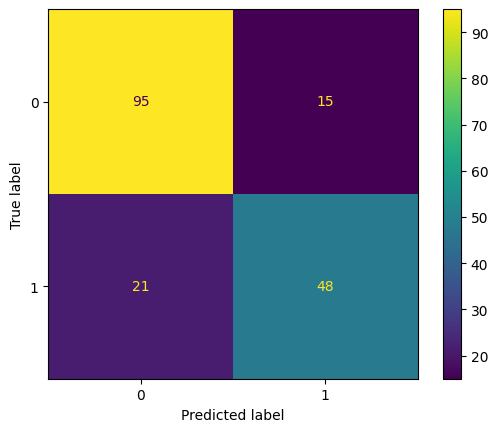

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



Validation Metrics for KNeighborsClassifier:
  Validation Accuracy: 0.8156
  Validation Precision: 0.8067
  Validation Recall: 0.8014
  Validation F1: 0.8038
  Validation ROC AUC: 0.8014
  Validation Confusion matrix: 
[[95 15]
 [18 51]]


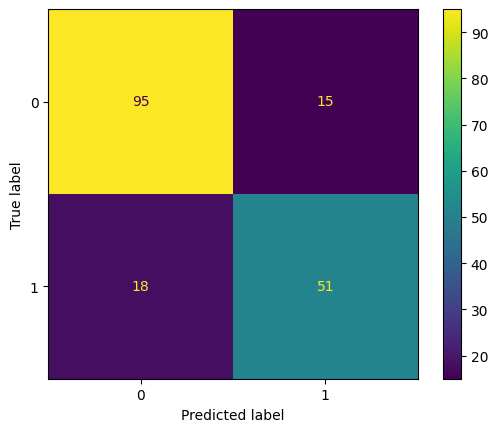

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



Validation Metrics for SVC:
  Validation Accuracy: 0.8156
  Validation Precision: 0.8067
  Validation Recall: 0.8014
  Validation F1: 0.8038
  Validation ROC AUC: 0.8014
  Validation Confusion matrix: 
[[95 15]
 [18 51]]


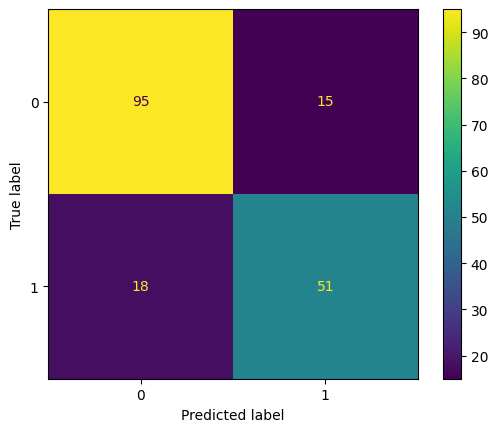

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179





In [83]:
# Initialize a dictionary to hold the trained pipelines
trained_pipelines = {}

# Loop to retrain each model on whole train set
for model_name, model in models_ensamble.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    #Train the pipeline
    trained_pipelines[model_name] = pipe.fit(X_train, y_train) 
    print(f"Validation Metrics for {model_name}:")
    print_validation_metrics(pipe, X_val, y_val)
    print("\n")

- **Ensemble Strategy with Voting Classifier:** Our ensemble strategy employs a Voting Classifier that integrates a variety of trained models—Logistic Regression, Random Forest, KNN, and SVC. This ensemble allows us to experiment with both 'soft' and 'hard' voting mechanisms. For 'soft' voting, where the prediction confidence of each classifier is considered, we aim to achieve a nuanced consensus that captures the predictive certainty of each model. This approach is particularly useful when the classifiers' confidence levels are informative and significantly vary. On the other hand, 'hard' voting, which might be used with specified weights, relies on a majority vote without regard to confidence levels, suitable for scenarios where we prioritize the most agreed-upon prediction among models. After fitting the ensemble to our training data, we assess its effectiveness on the validation set, carefully analyzing the ensemble's ability to generalize and make accurate predictions on unseen data.

In [84]:
from sklearn.ensemble import VotingClassifier

Validation Metrics for voting:
  Validation Accuracy: 0.7989
  Validation Precision: 0.7904
  Validation Recall: 0.7796
  Validation F1: 0.7840
  Validation ROC AUC: 0.7796
  Validation Confusion matrix: 
[[95 15]
 [21 48]]


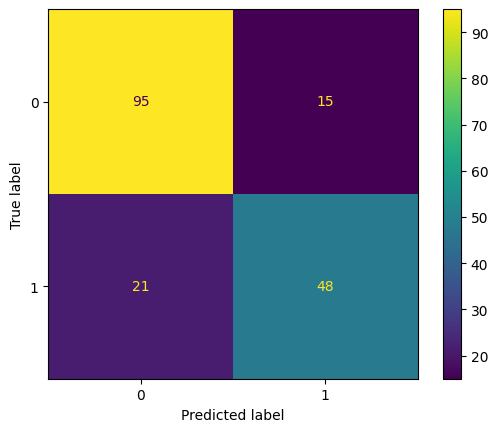

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179





In [85]:
voting_clf = VotingClassifier(estimators=[('LogisticRegression', trained_pipelines['LogisticRegression']), 
                                          ('RandomForestClassifier', trained_pipelines['RandomForestClassifier']),
                                          #('KNeighborsClassifier', trained_pipelines['KNeighborsClassifier']),  
                                          ('SVC', trained_pipelines['SVC'])], 
                              #voting='soft')
                              weights=[1,2,2], voting='hard')
                               
voting_clf.fit(X_train, y_train)

#Evaluate on the validation set using voting classifier
print(f"Validation Metrics for voting:")
print_validation_metrics(voting_clf, X_val, y_val)
print("\n")

In [86]:
final_predictions_voting = voting_clf.predict(X_test)

In [87]:
#create_submission_file(passanger_ids_test, final_predictions_voting, 'voting_v01')

- **Ensemble Strategy with Meta-Model Optimization (Stacking):** In our stacking ensemble strategy, we enhance prediction accuracy by generating meta-features from a diverse set of models including Random Forest, Logistic Regression, SVC, and KNN. These models, part of our trained pipelines, contribute their probabilistic predictions for both the validation and test sets, which are then compiled into meta-features. This process creates a new feature space that encapsulates the predictive patterns recognized by each individual model.

    - For the meta-model, we choose Logistic Regression due to its efficacy in interpreting these meta-features. A specific parameter grid is defined, exploring a range of regularization strengths (C values) and employing the liblinear solver for optimization, suitable for handling both L1 and L2 penalties effectively.

    - Utilizing GridSearchCV for cross-validation, we search this parameter space to find the optimal settings for our Logistic Regression meta-model. By fitting this meta-model on the meta-features derived from the validation set, we aim to leverage the combined insights of our primary models, thus achieving a more accurate and generalizable prediction capability.

    - This approach not only capitalizes on the strengths of individual models but also introduces an additional layer of refinement, allowing us to fine-tune our predictions based on the collective intelligence of the ensemble.

In [88]:

# Generate Meta-Features for Validation Set
models = ['RandomForestClassifier', 'LogisticRegression', 'SVC']  # Add or remove models based on your ensemble
meta_features_val = np.column_stack([
    trained_pipelines[model].predict_proba(X_val)[:, 1] for model in models
])

# Generate Meta-Features for Test Set
meta_features_test = np.column_stack([
    trained_pipelines[model].predict_proba(X_test)[:, 1] for model in models
])

# Define the parameter grid for the Logistic Regression meta-model
param_grid_meta = {
    'C': [0.01, 0.05, 0.1,1,10],
    'penalty': ['l2'],
    'solver': ['liblinear'],  # Solver 'liblinear' works well for L1 and L2 penalties
}

# Initialize GridSearchCV with cross-validation for the meta-model
grid_search_meta = GridSearchCV(LogisticRegression(random_state=15, max_iter=1000), 
                                param_grid_meta, cv=stratified_kfold, scoring=scoring_metrics, refit = 'accuracy', n_jobs=-1,verbose=0)

# Fit GridSearchCV using the meta-features from the validation set as training data
grid_search_meta.fit(meta_features_val, y_val)

 


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=844, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=15),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [89]:
# Print the best parameters and the best score achieved
print("Best parameters for meta-model:", grid_search_meta.best_params_)
print("Best score for meta-model:", grid_search_meta.best_score_)
print("\n")
print_metrics(grid_search_meta.cv_results_,scoring_metrics)


Best parameters for meta-model: {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for meta-model: 0.803921568627451


  Accuracy (best): 0.8039 with std of 0.0814
  Best Parameters:
  C: 0.05
  penalty: l2
  solver: liblinear


  Precision (best): 0.7990 with std of 0.1795
  Best Parameters:
  C: 0.01
  penalty: l2
  solver: liblinear


  Recall (best): 0.7095 with std of 0.1286
  Best Parameters:
  C: 0.05
  penalty: l2
  solver: liblinear


  F1 (best): 0.7355 with std of 0.1045
  Best Parameters:
  C: 0.05
  penalty: l2
  solver: liblinear


  Roc_auc (best): 0.8792 with std of 0.0819
  Best Parameters:
  C: 10
  penalty: l2
  solver: liblinear




- **Best meta estimator** to make final predictions.

In [90]:
best_meta_model = grid_search_meta.best_estimator_
final_predictions_stacking = best_meta_model.predict(meta_features_test)

In [91]:
#create_submission_file(passanger_ids_test, final_predictions_stacking, 'stacking_v01')

#### [Back to Table of Contents](#toc)

#### additional to explore:
- explore randomness of the dataset through different random states
- feature reduction - e.g. PCA
- additional feature engineering 
- error loss visualization
- most important fetures in models
- outliers analysis
- individually tuning of hyperparameters of base model for ensemble techniques (Voting and Stacking)